## 课时2: 分割抠图功能讲解及演示
### 人体分割
#### 1.功能描述
人体分割用于识别输入图像中的人体轮廓，与背景进行分离，返回分割后的前景人像图（4通道），适用于单人、多人、复杂背景、各类人体姿态等场景。

#### 2.应用场景
- 人像摄影：人体分割通过将摄影主体人物从背景中分割出来，将背景虚化，以达到大光圈浅景深效果，突出人物主体。
- 视频会议：在视频会议中，参会者所处环境背景不方便播出，或背景涉及到信息安全时，可将参会者人像从背景中分割出，替换成合适的背景。
- 证件照制作：上传或拍摄一张生活照，可将背景替换成白、蓝或红色背景，成为一张标准的证件照。

#### 3.输入限制
- 图片格式：JPEG、JPG、PNG（不支持8位、16位、64位PNG）、BMP、WEBP。
- 图像大小：输入图像大小不超过3M。
- 图像分辨率：分辨率要求小于1280×1280像素。
- URL地址中不能包含中文字符。
#### 4. 请求参数
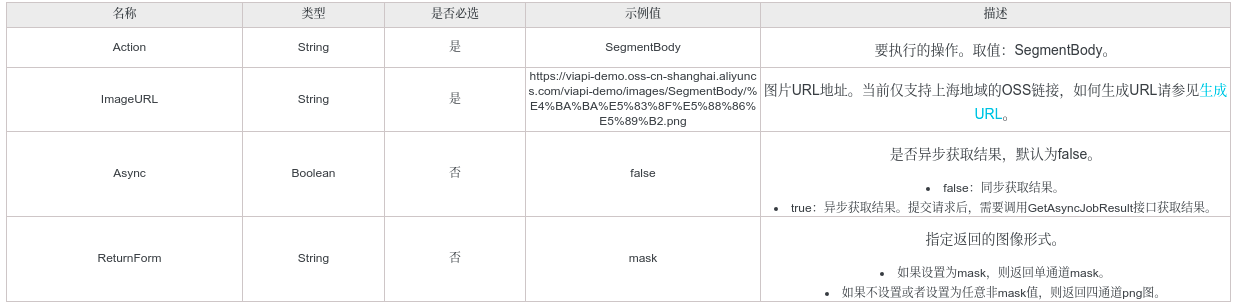
#### 5.返回参数
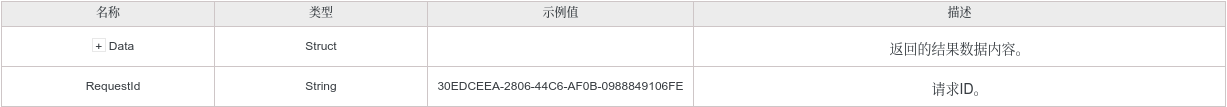

In [2]:
!pip install aliyunsdkcore

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 446 kB 3.4 MB/s eta 0:00:01
  Created wheel for aliyunsdkcore: filename=aliyunsdkcore-1.0.3-py2.py3-none-any.whl size=36155 sha256=44b3bcf19d8f2f8fe9f6b63755b49966daa0490ac0e849b4b23d8c3c40358894
  Stored in directory: /home/lonelvino/.cache/pip/wheels/45/b7/4e/f124cfe3880d37d36818ab8204b7d11e985f13c21c4c74ae8e
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp38-cp38-linux_x86_64.whl size=499316 sha256=e1a67caa5247ee8c4efbaa6a86c26aa26415c892f0c6d4575fb8f4e1c285f7dd
  Stored in directory: /home/lonelvino/.cache/pip/wheels/d0/99/d0/0298ea019d63f1d63a0965b9944b719e875f9bd6ffc6dcf293
Successfully built aliyunsdkcore pycrypto


In [6]:
#!/usr/bin/env python
#coding=utf-8

from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkimageseg.request.v20191230.SegmentBodyRequest import SegmentBodyRequest

url = 'https://viapi-demo.oss-cn-shanghai.aliyuncs.com/viapi-demo/images/SegmentBody/%E4%BA%BA%E5%83%8F%E5%88%86%E5%89%B2.png'
accessKeyId = 'LTAI4GBqHh8WVhRqW41vhGJe'
accessSecret = 'g2FdObRItS1g0smulqKSuZs31RETkQ'
client = AcsClient(accessKeyId, accessSecret, 'cn-shanghai')

request = SegmentBodyRequest()
request.set_accept_format('json')
# request.set_ImageURL(url)
request.set_ImageURL("http://viapi-test.oss-cn-shanghai.aliyuncs.com/viapi-3.0domepic/imageseg/SegmentBody/SegmentBody1.png")

response = client.do_action_with_exception(request)
resultJson = str(response, encoding="utf-8")
print(resultJson)

import json
resultUrl = json.loads(resultJson)['Data']['ImageURL']

import requests
with requests.get(resultUrl) as r:
    with open('./result.png', 'wb') as f:
        f.write(r.content)

{"RequestId":"04900C33-0C28-47C8-8446-6516F3729C5D","Data":{"ImageURL":"http://viapi-cn-shanghai-dha-segmenter.oss-cn-shanghai.aliyuncs.com/upload/result_humansegmenter/2021-3-7/invi_humansegmenter_016151199230541028935_O1o9gX.png?Expires=1615121723&OSSAccessKeyId=LTAI4FoLmvQ9urWXgSRpDvh1&Signature=IMgmmyFH9Xy5iuPKV4hA3g57WlQ%3D"}}


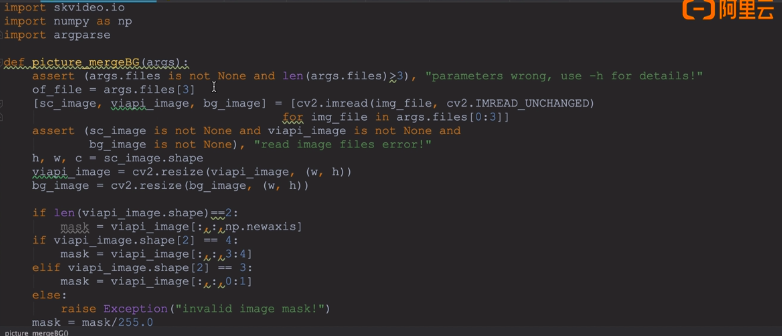
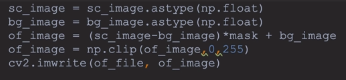


### 身份证识别
#### 功能描述
RecognizeIdentityCard可以识别二代身份证关键字段内容，关键字段包括：姓名、性别、民族、身份证号、出生日期、地址信息、有效起始时间、签发机关，同时可输出身份证区域位置和人脸位置信息。

#### 3.输入限制
- 图片格式：JPEG、JPG、PNG（不支持8位、16位、64位PNG）、BMP、WEBP。
- 图像大小：输入图像大小不超过3M。
- 图像分辨率：分辨率要求小于1280×1280像素。
- URL地址中不能包含中文字符。
#### 4. 请求参数
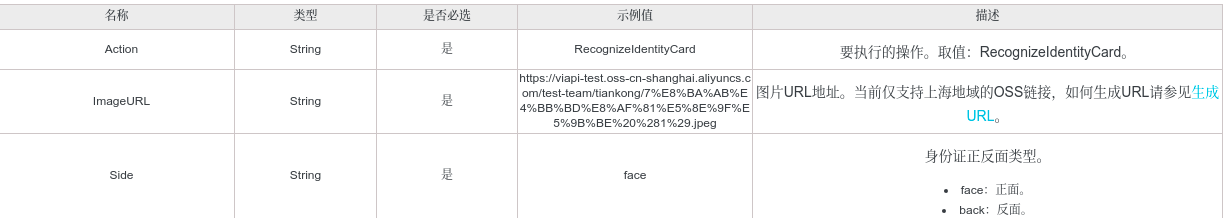
#### 5.返回参数
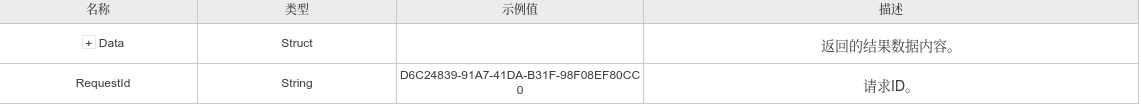

In [10]:
#!/usr/bin/env python
#coding=utf-8
from aliyunsdkocr.request.v20191230.RecognizeIdentityCardRequest import RecognizeIdentityCardRequest

client = AcsClient(accessKeyId, accessSecret, 'cn-shanghai')

request = RecognizeIdentityCardRequest()
request.set_accept_format('json')

request.set_Side("face")
request.set_ImageURL("http://viapi-test.oss-cn-shanghai.aliyuncs.com/viapi-3.0domepic/ocr/RecognizeIdentityCard/sfz1.jpg")

response = client.do_action_with_exception(request)
# python2:  print(response) 
print(str(response, encoding='utf-8'))

import json
resultData = json.loads(resultJson)['Data']
print(resultData)

{"RequestId":"27BF0644-DF68-429F-8DC3-18108059071C","Data":{"FrontResult":{"Address":"江苏省南京市浦口区天天小区1栋11号","FaceRectVertices":[{"X":708.55352783203125,"Y":309.82846069335938},{"X":612.39801025390625,"Y":305.3739013671875},{"X":617.73992919921875,"Y":190.06512451171875},{"X":713.89544677734375,"Y":194.51968383789062}],"FaceRectangle":{"Center":{"X":663.146728515625,"Y":249.94679260253906},"Angle":-87.347572326660156,"Size":{"Height":96.258598327636719,"Width":115.43246459960938}},"CardAreas":[{"X":166,"Y":97},{"X":775,"Y":97},{"X":775,"Y":460},{"X":166,"Y":460}],"Gender":"","Nationality":"汉","Name":"小明","IDNumber":"","BirthDate":""}}}
{'ImageURL': 'http://viapi-cn-shanghai-dha-segmenter.oss-cn-shanghai.aliyuncs.com/upload/result_humansegmenter/2021-3-7/invi_humansegmenter_016151199230541028935_O1o9gX.png?Expires=1615121723&OSSAccessKeyId=LTAI4FoLmvQ9urWXgSRpDvh1&Signature=IMgmmyFH9Xy5iuPKV4hA3g57WlQ%3D'}
